# Projeto 2 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [33]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Proposta

Classificar a comestibilidade (comestível ou venenoso) de um cogumelo com base em características morfológicas e ecológicas.

Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification

**Obs**: este é o terceiro notebook do projeto, e se propõe a explicar e aplicar o classificador Random Forest.

# Carregando Dados

In [34]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [35]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [36]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

### Tradução do dataset para português

Nas próximas duas células, foi feita uma adaptação do dataset para a língua portuguesa, de modo a permitir uma melhor interpretação dos dados.

In [37]:
dataset = dataset.rename(columns = 
                     {'class': 'classe',
                      'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

In [38]:
dataset['classe']=dataset['classe'].astype('category')
dataset['classe'].cat.categories = ['comestível', 'venenoso']

dataset['formato-chapéu']=dataset['formato-chapéu'].astype('category')
dataset['formato-chapéu'].cat.categories = ['sino', 'cone', 'reto', 'nodoso', 'afundado', 'convexo']

dataset['superfície-chapéu']=dataset['superfície-chapéu'].astype('category')
dataset['superfície-chapéu'].cat.categories = ['fibroso', 'ranhuras', 'liso', 'escamoso']
 
dataset['cor-chapéu']=dataset['cor-chapéu'].astype('category')
dataset['cor-chapéu'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'rosa', 'verde', 'roxo', 'branco', 'amarelo']

dataset['hematomas']=dataset['hematomas'].astype('category')
dataset['hematomas'].cat.categories = ['não tem' , 'tem']

dataset['odor']=dataset['odor'].astype('category')
dataset['odor'].cat.categories = ['amêndoa', 'creosote', 'podre', 'anis', 'mofado', 'nenhum', 'pungente', 'picante', 'peixe']

dataset['ligação-lamela']=dataset['ligação-lamela'].astype('category')
dataset['ligação-lamela'].cat.categories = ['conectada', 'solta']

dataset['espaçamento-lamela']=dataset['espaçamento-lamela'].astype('category')
dataset['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

dataset['tamanho-lamela']=dataset['tamanho-lamela'].astype('category')
dataset['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

dataset['cor-lamela']=dataset['cor-lamela'].astype('category')
dataset['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

dataset['formato-estipe']=dataset['formato-estipe'].astype('category')
dataset['formato-estipe'].cat.categories = ['alargando', 'afunilando']
    
dataset['raiz-estipe']=dataset['raiz-estipe'].astype('category')
dataset['raiz-estipe'].cat.categories = ['não tem', 'bulboso', 'clava', 'reto', 'enraizado']

dataset['superfície-estipe-sobre-anel']=dataset['superfície-estipe-sobre-anel'].astype('category')
dataset['superfície-estipe-sobre-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['superfície-estipe-sob-anel']=dataset['superfície-estipe-sob-anel'].astype('category')
dataset['superfície-estipe-sob-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['cor-estipe-sobre-anel']=dataset['cor-estipe-sobre-anel'].astype('category')
dataset['cor-estipe-sobre-anel'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['cor-estipe-sob-anel']=dataset['cor-estipe-sob-anel'].astype('category')
dataset['cor-estipe-sob-anel']. cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['tipo-volva']=dataset['tipo-volva'].astype('category')
dataset['tipo-volva'].cat.categories = ['parcial']

dataset['cor-volva']=dataset['cor-volva'].astype('category')
dataset['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

dataset['quantidade-anéis']=dataset['quantidade-anéis'].astype('category')
dataset['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

dataset['tipo-anel']=dataset['tipo-anel'].astype('category')
dataset['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

dataset['cor-impressão-esporo']=dataset['cor-impressão-esporo'].astype('category')
dataset['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']

dataset['população']=dataset['população'].astype('category')
dataset['população'].cat.categories=['abundante', 'aglomerado', 'numeroso', 'espalhado', 'diverso', 'solitário']

dataset['habitat']=dataset['habitat'].astype('category')
dataset['habitat'].cat.categories=['madeira', 'gramínea', 'folha', 'pradaria', 'trilha', 'urbano', 'lixo']

Para poder aferir a performance do classificador, é necessário separar a base de dados em duas: treinamento e teste. Essa separação foi feita numa proporção de 3:1, ou seja, 25% Teste e 75% Treinamento.

Obs.: o atributo random_state deve ser igualado a 1 para impedir que, a cada vez que o código é rodado, seja feita uma divisão entre Treinamento e Teste diferente. Isso garante que o classificador também seja sempre o mesmo.

In [39]:
train, test = train_test_split(dataset, test_size=0.25, random_state=1)  # separar dataset em treinamento e teste

# Classificador Random Forest

Esta seção é destinada à aplicação do modelo de classificação Random Forest. Esse modelo utiliza a base treinamento (separada a partir do dataset) para prever a classe de um dado cogumelo.

**Motivação**: a Random Forest foi escolhida como a segunda classificação pois é como se fosse uma evolução da Decision Tree, porém, apresentando algumas vantagens em relação a primeira e caracterizando-se como um método de classificação mais robusto.

### Funcionamento do Classificador

O classificador Random Forest está intimamente relaciona à técnica de Decision Trees. A diferença é que o Random Forest cria várias Decisions Trees e escolhe aleatoriamente uma amostra dos dados fornecidos (neste projeto, dos cogumelos), obtendo uma previsão de cada árvore e seleciona a melhor solução por meio de votos. Ao longo do processo, são definidas as features dde maior relevância para o processo de classificação.

Um exemplo de utilização do algoritmo do Random Forest pode ser o mecanismo de recomendação de um certo aplicativo com a base das pesquisas do usuário ou prever algo por meio dos dados fornecidos de um certo assunto. O seu funcionamento se dá pelo método ensemble. No caso de uma calssificação, é basicamente um conjunto de Decison Trees em que cada árvore vota em uma classe. Assim, a classe que tiver mais votos será a responsável por dar o resultado final. No caso da regressão, é feita uma média dos votos das árvores de decisão.

<img src=img/Random_Forest.png width=40%>

#### Vantagens

* O classificador Random Forest é bem presciso e robusto em relação na sua classificação, pois é um conjunto de Decision Tree fazendo sua escolha.

* O classificador não tem o problema com overfitting, pois é feita uma média das previsões, ignorando os vieses.

* O algoritmo pode ser usado em nos casos de classificação e regressão.

* O Random Forests consegue lidar com os valores ausentes, por meio da mediana para substituir essa variável ou fazer uma média ponderada de proximidade desses valores ausentes. 

* Com o classificador podemos encontrar as features mais relevantes, assim ajudando a selecionar as features que mais contribui para o classificador.

#### Desvantagens

* O classificador, por ter várias árvores de decisão, pode ser um processo demorado. Sempre que ele faz uma previsão, todas as árvores têm que fazer uma previsão para o mesmo dado de entrada e, em seguida, votar nele. 

* Comparando com a Decision Tree, o classificador Random Forest pode ser mais complexo para se entender, onde simplesmente poderia ter seguido o caminhon da árvore de decisão.

### Aplicação do Classificador

Nesta seção, será devidamente aplicado o classificador Random Forest. Ao longo da aplicação, serão explicadas as razões por trás de cada código, bem como o funcionamento da biblioteca sklearn.tree, utilizada para fazer o modelo.

### Preparando os dados de treinamento:

Assim como no classificador Decision Tree, é preciso preparar os dados, transformando os dados em dummies e separando a base de treinamento de target (Y) e features (X). O processo é igual ao realizado no notebook 2.

In [40]:
colunas_feature = list(train.columns)
colunas_feature.remove('classe')

X = train.loc[:, colunas_feature]
X = pd.get_dummies(X)
X.head(3)

,formato-chapéu_sino,formato-chapéu_cone,formato-chapéu_reto,formato-chapéu_nodoso,formato-chapéu_afundado,formato-chapéu_convexo,superfície-chapéu_fibroso,superfície-chapéu_ranhuras,superfície-chapéu_liso,superfície-chapéu_escamoso,...,população_espalhado,população_diverso,população_solitário,habitat_madeira,habitat_gramínea,habitat_folha,habitat_pradaria,habitat_trilha,habitat_urbano,habitat_lixo
6253,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2739,0,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
7436,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [41]:
train.loc[train['classe']=='venenoso', 'y'] = 1
train.loc[train['classe']=='comestível', 'y'] = 0
y=train.loc[:, 'y']
y.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


6253    1.0
2739    0.0
7436    1.0
Name: y, dtype: float64

### Criando o modelo:

Com os dados devidamente preparados, é possível aplicar o classificador Random Forest. Para isso, basta importar as bibliotecas do SciKit Learn necessárias e aplicar o código "fit" nas variáveis X (features) e y (target) preparadas no item anterior.

Vale ressaltar que, para o atributo "random_state" do código abaixo, foi dado o valor 1 de modo a fazer com que o classificador utilize sempre a mesma Decision Tree.

In [42]:
from sklearn.ensemble import RandomForestClassifier 

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X, y)

RandomForestClassifier(random_state=1)

## Testando a performance do modelo:

Novamente, não basta apenas o classificador funcionando, é preciso avaliar sua acurácia. Para isso, serão utilizados métodos semelhantes aos utilizados no notebook anterior.

#### Teste de Underfitting

In [43]:
score_treinamento=clf.score(X, y)
print('O score do classificador quando aplicado à própria base de treinamento é de {}%. Logo, não há underfitting.'.format(score_treinamento*100))

O score do classificador quando aplicado à própria base de treinamento é de 100.0%. Logo, não há underfitting.


#### Teste de Overfitting

Será preciso preparar a base de testes da mesma forma que a base de treinamento, ou seja: transformar variáveis em dummies e separarar a base em X e Y.

In [44]:
X_test = test.loc[:, colunas_feature]
X_test = pd.get_dummies(X_test)

test.loc[test['classe']=='venenoso', 'y_test']=1
test.loc[test['classe']=='comestível', 'y_test']=0
y_test=test.loc[:, 'y_test']
y.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


6253    1.0
2739    0.0
7436    1.0
Name: y, dtype: float64

Na célula abaixo, obtém-se o score do modelo quando aplicado à base de testes:

In [45]:
score_teste=clf.score(X_test, y_test)
print('O score do classificador quando aplicado à base de teste é de {}%. Logo, não há overfitting.'.format(score_teste*100))

O score do classificador quando aplicado à base de teste é de 100.0%. Logo, não há overfitting.


#### Validação Cruzada

O teste da validação cruzada é feito aqui da mesma forma que foi feito no notebook 2.

In [46]:
from sklearn.model_selection import cross_val_score  # função do SciKit Learn que faz a validação cruzada

X_cross = dataset.loc[:, colunas_feature]
X_cross = pd.get_dummies(X_cross)

dataset.loc[dataset['classe']=='venenoso', 'y_cross'] = 1
dataset.loc[dataset['classe']=='comestível', 'y_cross'] = 0
y_cross=dataset.loc[:, 'y_cross']

clf.fit(X_cross, y_cross)

score_medio=cross_val_score(clf, X_cross, y_cross, cv=10).mean()  # rodando a validação cruzada 10 vezes (cv=10) e obtendo a média
print('O score médio da validação cruzada é {}%. Pode-se afirmar que a performance do classificador é alta.'.format((score_medio*100).round(2)))

O score médio da validação cruzada é 96.46%. Pode-se afirmar que a performance do classificador é alta.


## Features mais Relevantes

Outra informação interessante que pode ser obtida por meio da biblioteca SciKit Learn são as importâncias de cada feature para o processo de classificação. A unidade de medida dessa importância é em porcentagem, indicando que se trata de um comparação entre features.

O código abaixo serve para definir as features cuja importância é pelo menos 5 %.

Vale ressaltar que as features mais importantes variam conforme o código roda. Isso se deve ao classificador selecionar árvores de decisão diferentes a cada rodada.

In [47]:
importancias = clf.feature_importances_
mais_imp = []
mais_imp_numero = []
i=0
for imp in importancias:
    if imp>0.05:
        mais_imp.append(X.columns[i])
        mais_imp_numero.append(imp)
    i+=1

Uma maneira legal de visualizar a importância das features é um gráfico de barras. Para isso, utilizou-se a biblioteca Seaborn.

No handles with labels found to put in legend.


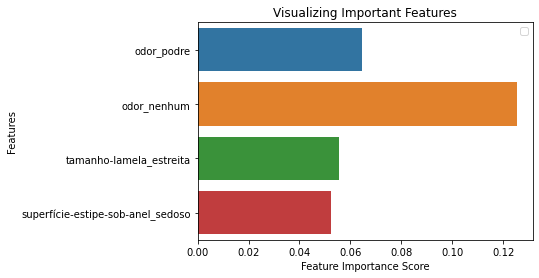

In [48]:
import seaborn as sns

sns.barplot(x=mais_imp_numero, y=mais_imp)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Comentários Finais

Pode-se concluir que o modelo Random Forest é bastante eficiente para classificar cogumelos. No entanto, novamente, isso não siginifica que o o projeto terminou. O modelo de Random Forest também possui certas desvantagens, e por isso não se pode concluir que ele é um classificador perfeito somente porque seu score é alto. 

Por isso será aplicado mais um classificador: a Regressão Logística. Esse classificador é bastante diferente dos dois utilizados até então, e será explicado no notebook 4.

## Referências 

Definição, utilizaçãoo funcionamneto teórico, vantagens e desvantagens do classificador Random Forest:
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python

Método Ensemble:
- https://didatica.tech/metodos-ensemble/

biblioteca do SciKit Learn para o classificador Random Forest:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html